In [29]:
%matplotlib inline

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
pd.options.display.float_format = '{:.2f}'.format

In [32]:
def chebyshev(ex, std, prob):
    n = np.sqrt(1/prob)
    low = ex - n * std
    high = ex + n * std
    return low, high

In [33]:
def add_chebyshev_low(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.005)
    return cheb_low

def add_chebyshev_high(row):
    ex = row.loc["mean"]
    std = row.loc["std"]
    cheb_low, cheb_high = chebyshev(ex, std, 0.005)
    return cheb_high


In [34]:
df = pd.read_csv("delaunay_slow.csv"); df
df['diff'] = df.apply(lambda row: row['diff'] / row['N'], axis=1)
df['removed'] = df.apply(lambda row: row['removed'] / row['N'], axis=1)

# Trójąty usunięte

### Należy nadmienić, że bardzo ważną rolę gra tutaj stworzenie **super trójkąta** obejmującego wszystkie punkty które będziemy triangulować

In [35]:
df.groupby('N').describe()['removed']

,count,mean,std,min,25%,50%,75%,max
N,,,,,,,,
100,1000.00,3.81,0.12,3.29,3.73,3.80,3.89,4.21
200,1000.00,3.85,0.09,3.55,3.79,3.85,3.92,4.14
300,1000.00,3.88,0.08,3.66,3.82,3.88,3.93,4.15
400,1000.00,3.90,0.07,3.70,3.85,3.90,3.94,4.09
500,1000.00,3.91,0.06,3.73,3.87,3.91,3.95,4.10
600,1000.00,3.92,0.06,3.75,3.88,3.92,3.95,4.10
700,1000.00,3.93,0.05,3.77,3.89,3.93,3.97,4.12
800,1000.00,3.93,0.05,3.77,3.90,3.93,3.96,4.08
900,1000.00,3.93,0.05,3.79,3.90,3.93,3.96,4.08


Możemy wywnioskować że
$$ \mathbb{E} [\Delta \text{bad}] \approx 3.94 $$

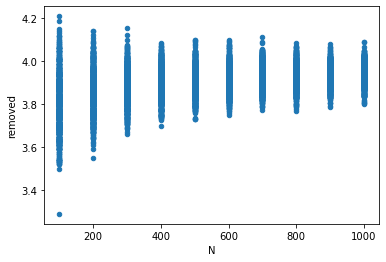

In [36]:
df.plot.scatter(x="N", y="removed")

## Kontrprzykład - n-kąt foremny psuje $n-2$ trójkątów
![1](img/1.png)
![2](img/2.png)
![3](img/3.png)

# Trójkąty dodane

In [37]:
df.groupby('N').describe()['diff']

,count,mean,std,min,25%,50%,75%,max
N,,,,,,,,
100,1000.00,2.08,0.00,2.08,2.08,2.08,2.08,2.08
200,1000.00,2.04,0.00,2.04,2.04,2.04,2.04,2.04
300,1000.00,2.03,0.00,2.03,2.03,2.03,2.03,2.03
400,1000.00,2.02,0.00,2.02,2.02,2.02,2.02,2.02
500,1000.00,2.02,0.00,2.02,2.02,2.02,2.02,2.02
600,1000.00,2.01,0.00,2.01,2.01,2.01,2.01,2.01
700,1000.00,2.01,0.00,2.01,2.01,2.01,2.01,2.01
800,1000.00,2.01,0.00,2.01,2.01,2.01,2.01,2.01
900,1000.00,2.01,0.00,2.01,2.01,2.01,2.01,2.01


Możemy wywnioskować że gdy
$$ \lim_{n\rightarrow\inf} \longrightarrow \mathbb{E} [\Delta \text{created}] = 2 $$

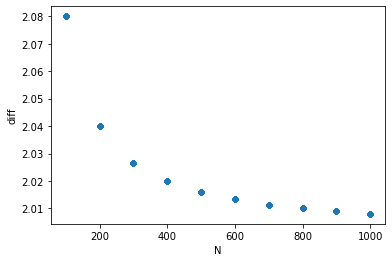

In [38]:
df.plot.scatter(x="N", y="diff")

# Iteracje

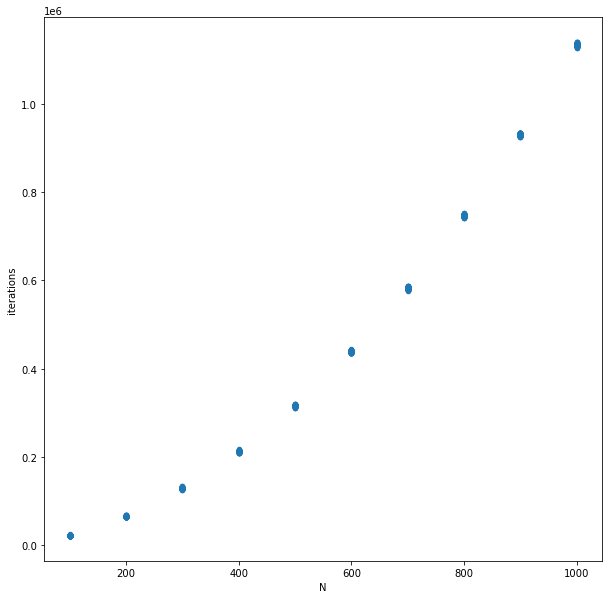

In [70]:
df.plot.scatter(x="N", y="iterations", figsize=(10, 10))

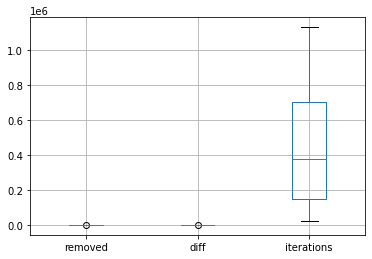

In [39]:
grouped = df.groupby("N")
grouped.mean().boxplot()

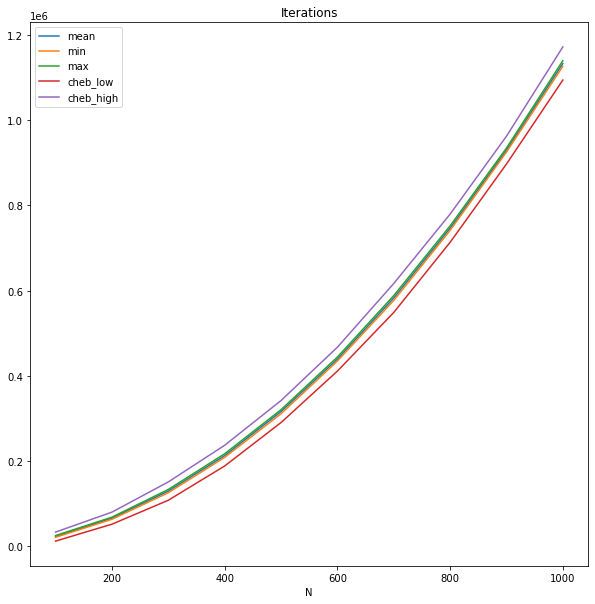

In [72]:
described = grouped["iterations"].describe(percentiles=[]).drop(["count", "50%"], axis='columns')
described["cheb_low"] = described.apply(add_chebyshev_low, axis=1)
described["cheb_high"] = described.apply(add_chebyshev_high, axis=1)
described.drop(["std"], axis='columns').plot(title="Iterations", figsize=(10,10))